In [36]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter,lfilter,filtfilt,spectrogram
import IPython
from IPython.display import Audio
import ipywidgets

w=wavfile.read(filename=r"c:\Users\Valentin\Documents\wav\v2\Безымянный (3).wav")
w=w[1][:,0]
framerate=44100
duration=w.shape[0]/framerate

def plotspec(signal, uselog=False, ax=None, **kwargs):
    ax = ax if ax else plt.gca()
    sp = np.abs(np.fft.fft(signal))[:signal.size//2]
    if uselog:
        sp = uselog(sp) if callable(uselog) else 20*np.log(sp)
    l=ax.plot(np.fft.fftfreq(signal.size,d=1/framerate)[:signal.size//2], sp,**kwargs)
    ax.set_xlabel('Frequency, Hz')
    return l[0]

def showsig(signal,**kwargs):
    plt.figure(figsize=(18,4))
    plt.subplot(121)
    plotspec(signal,**kwargs)
    plt.xlim([260, 400])
    plt.ylim([0, 5e8])
    plt.subplot(122)
    plt.plot(np.linspace(0,len(signal)/framerate, len(signal),endpoint=False),signal,**kwargs)
    plt.xlim(0, 3)
    plt.ylim(-32768, 32768)
    plt.xlabel('Time, sec')
    plt.show()
    IPython.display.display(Audio(data=signal,rate=framerate))

def plotspecgram(signal, vmin, vmax=35, ax=plt, uselog=True):
    f,t,s=spectrogram(signal,fs=framerate,nperseg=2000, noverlap=1900,window='hann')
    s = s/s.max()

    s = np.log(s)*10 if uselog else s*7e8

    img=ax.imshow(s,extent=[min(t),max(t),min(f),max(f)],origin='xy',aspect='auto', vmax=vmax, vmin=vmin, cmap='seismic')
    ax.set_xlabel('Time, sec')
    ax.set_ylabel('Frequency, Hz')
    plt.colorbar(img, ax=ax)
    ax.set_xlim(0, 3)
    ax.set_ylim(0, 2000)

## Pure tone

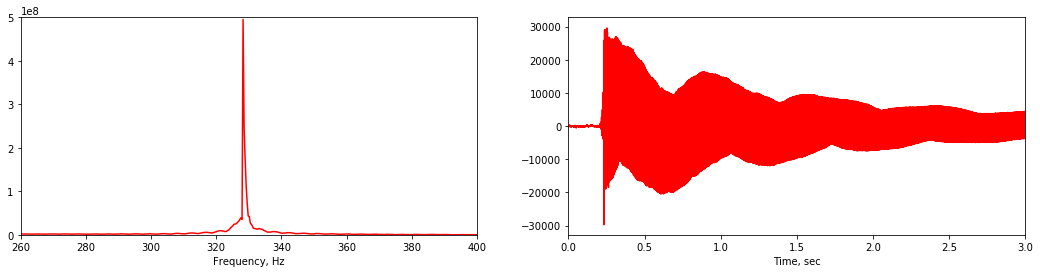

In [2]:
pure=w[128000:268000]
showsig(pure,c='r')

## Vibrato

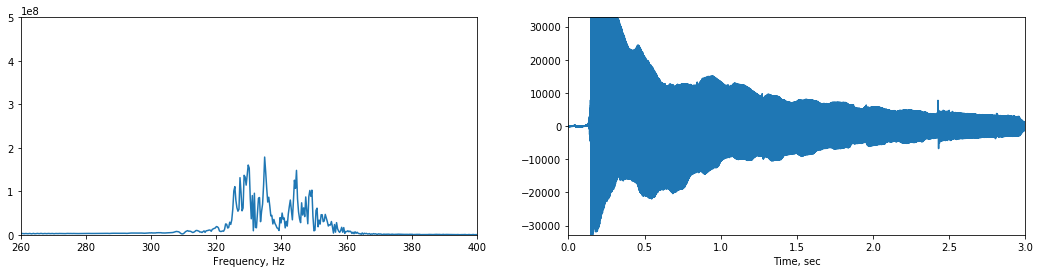

In [3]:
vibrato=w[630000:770000]
showsig(vibrato)

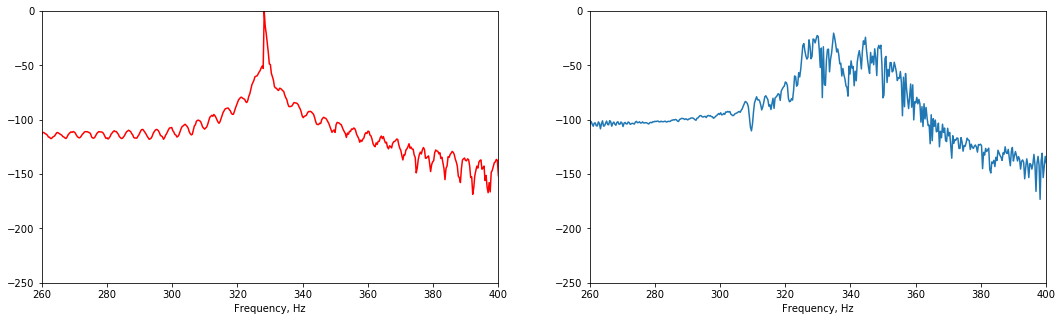

In [39]:
class NormDb:
    def __init__(self,refsig):
        self.maxvalue=np.abs(np.fft.fft(refsig)).max()
    def __call__(self,sp):
        return 20*np.log(sp/self.maxvalue)

db_calc=NormDb(pure)

plt.figure(figsize=(18,5))

plot_index=121
for s,c in zip([pure, vibrato],['r',None]):
    plt.subplot(plot_index)
    plotspec(s, uselog=db_calc, c=c)
    plt.xlim([260, 400])
    plt.ylim([-250,0])
    plot_index+=1


plt.show()

## Comparison

In [5]:
def compare(uselog,ymin=None,ymax=None):    
    if uselog: uselog=NormDb(pure)
        
    plt.figure(figsize=(18,6))
    a=plt.gca()

    l1=plotspec(vibrato,uselog=uselog,ax=a)
    l2=plotspec(pure,uselog=uselog,ax=a,c='r')

    plt.xlim([0, 2000])
    plt.ylim(ymin=ymin, ymax=ymax)
    plt.legend([l2,l1],['pure','vibrato'])

    plt.show()

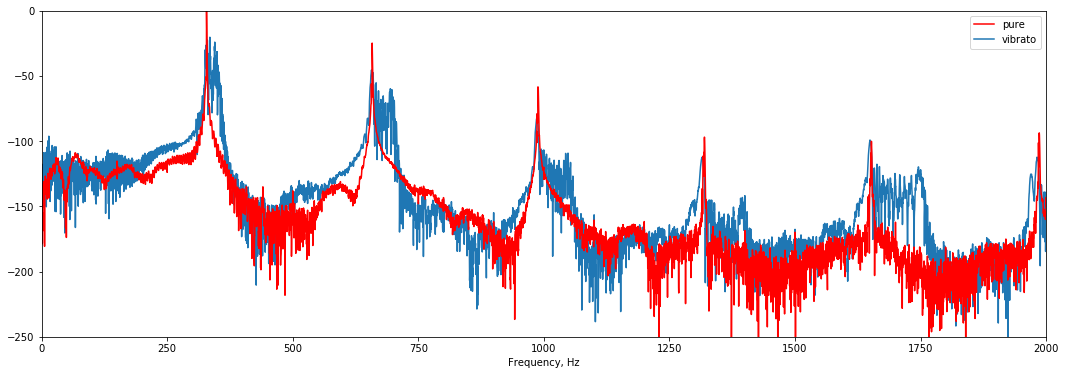

In [6]:
compare(uselog=True,ymin=-250,ymax=0)

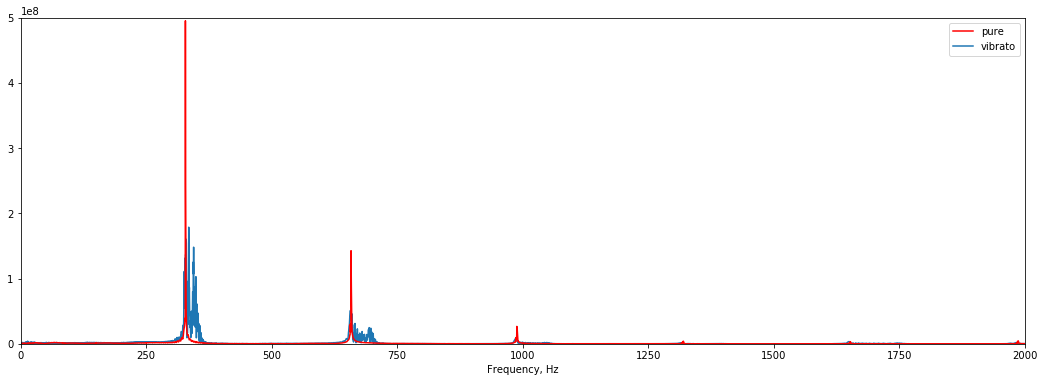

In [38]:
compare(uselog=False,ymin=0, ymax=5e8)

## Pure tone spectrogram

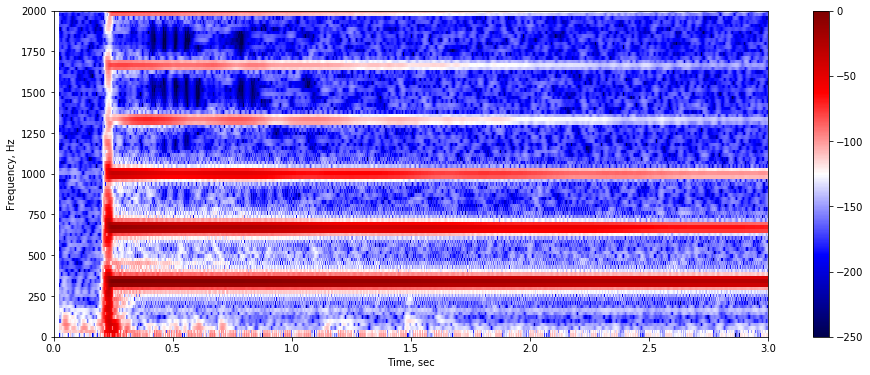

In [30]:
plt.figure(figsize=(16,6))
plotspecgram(pure,-250,None,plt.gca())
plt.show()

## Vibrato spectrogram

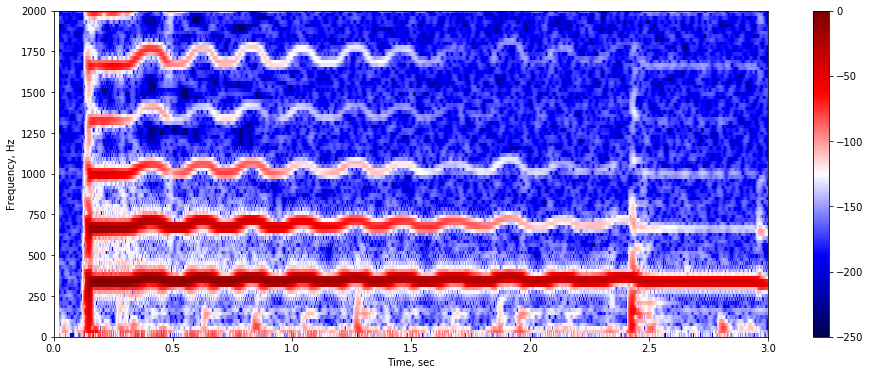

In [29]:
plt.figure(figsize=(16,6))
plotspecgram(vibrato,-250,None,plt.gca())
plt.show()

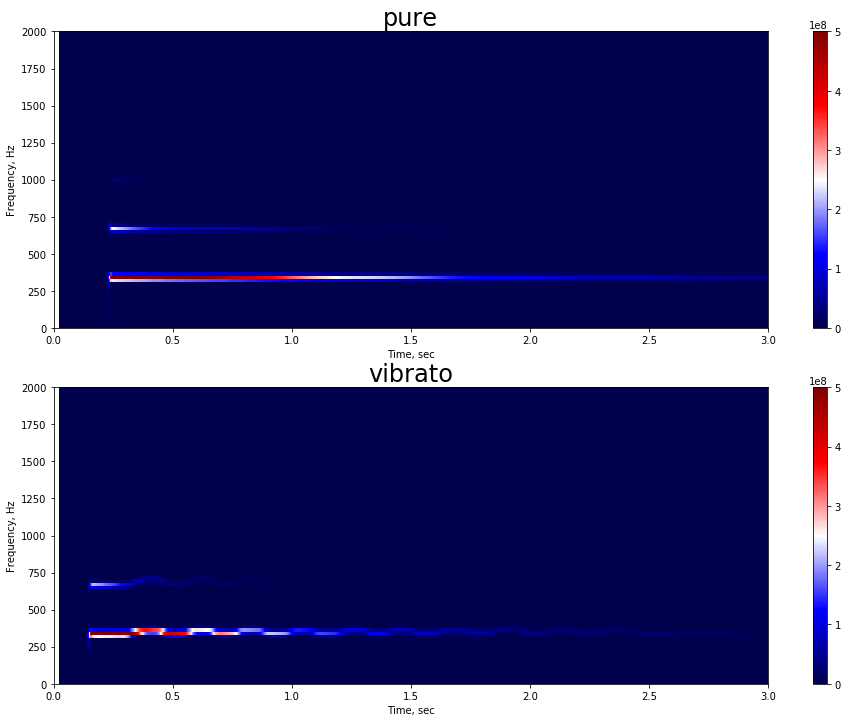

In [37]:
@ipywidgets.interact(vmin=(0,1e9,1e7), vmax=(0,1e9,1e7))
def plot(vmin=0,vmax=5e8):
    f,ax=plt.subplots(2,1,figsize=(16,12))
    plotspecgram(pure, vmin, vmax, ax[0],uselog=False)
    plotspecgram(vibrato, vmin, vmax, ax[1],uselog=False)
    ax[0].set_title('pure', fontsize=24)
    ax[1].set_title('vibrato', fontsize=24)
    plt.show()